<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/cluster_colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
filen = 'boykid.jpg'
import matplotlib.image as mpimg
img = mpimg.imread(filen)

In [16]:
img.shape

(1600, 1063, 3)

In [8]:
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel

In [18]:
pixels = np.array([pixel for row in img for pixel in row])

In [19]:
pixels.shape

(1700800, 3)

In [36]:
clusterer = KMeans(3)
clusterer.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
print(pixels)

[[109 105  96]
 [108 105  96]
 [107 107  99]
 ...
 [ 94  76  56]
 [ 94  76  56]
 [ 94  76  56]]


In [37]:
#new_img = [[recolor(pixel) for pixel in row] for row in img]
new_colors = clusterer.cluster_centers_[clusterer.predict(pixels)]
new_colors = new_colors.astype(int)

In [32]:
print(new_colors)

[[101  96 109]
 [101  96 109]
 [101  96 109]
 ...
 [ 92  75  57]
 [ 92  75  57]
 [ 92  75  57]]


In [38]:
boy_recolored = new_colors.reshape(img.shape)

In [34]:
boy_recolored.shape

(1600, 1063, 3)

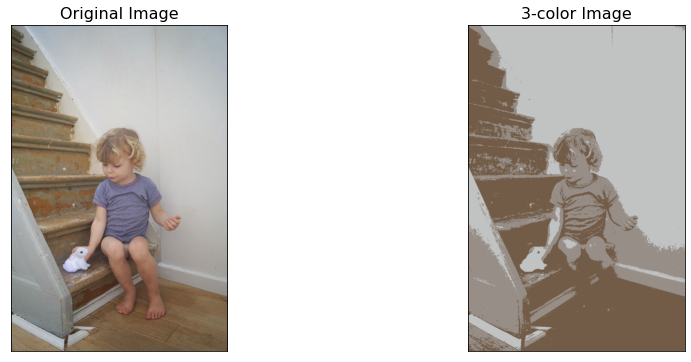

In [40]:


fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(boy_recolored)
ax[1].set_title('3-color Image', size=16);